../../output/5_3/updated_average_results_fixed_N_31_v1.xlsx

../../output/5_3/updated_average_results_fixed_N_33_v1.xlsx

../../output/5_3/updated_average_results_fixed_N_35_v1.xlsx

../../output/5_3/updated_average_results_fixed_N_31_v1.xlsx

../../output/5_3/updated_average_results_fixed_N_33_v1.xlsx

../../output/5_3/updated_average_results_fixed_N_35_v1.xlsx



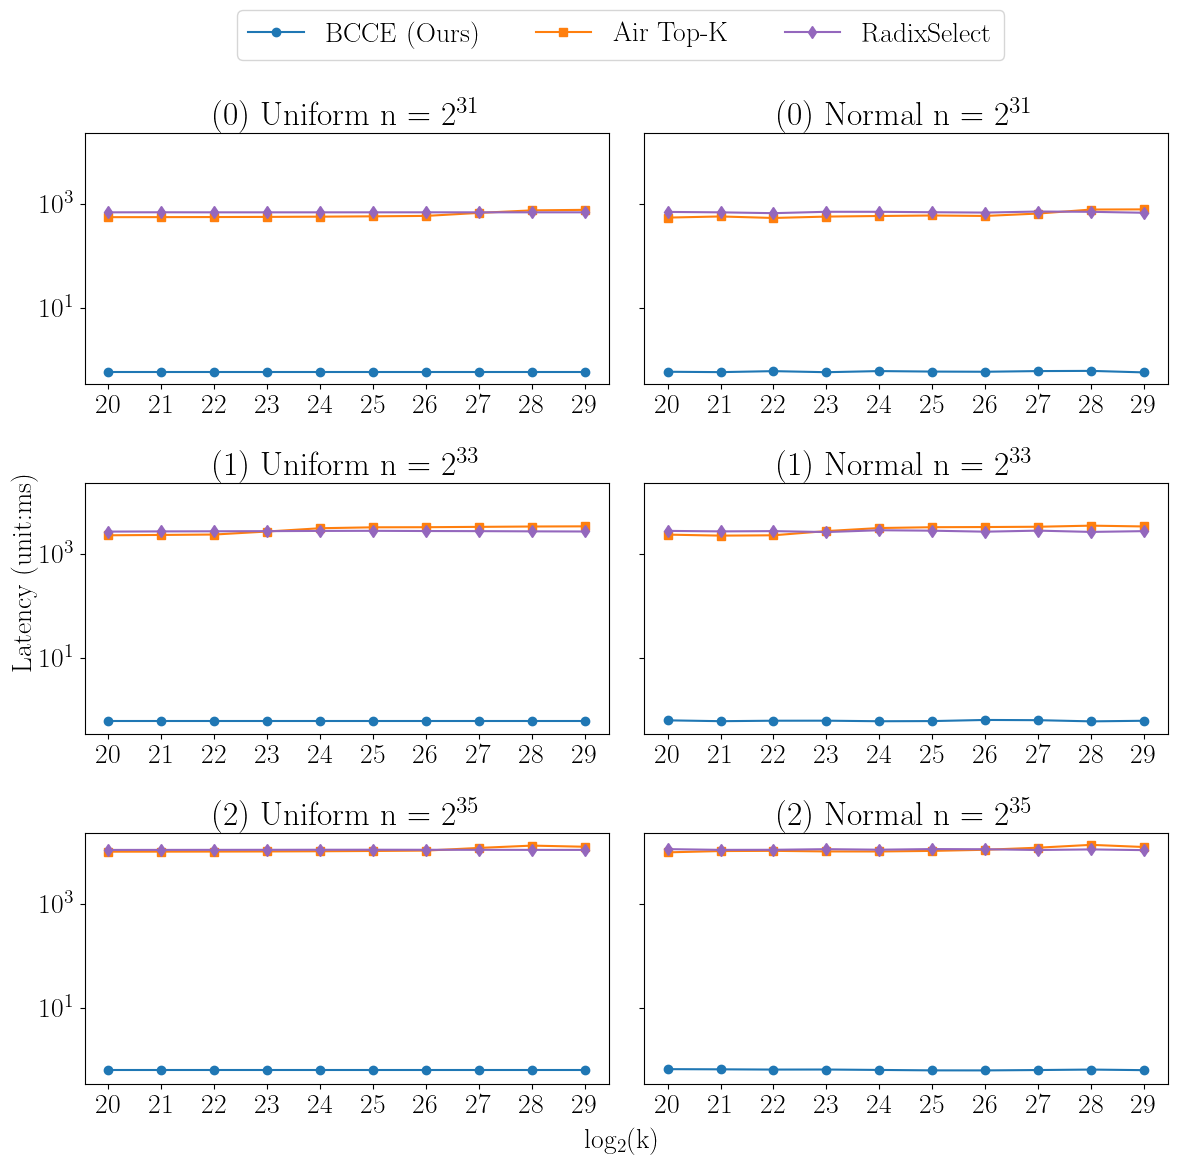

In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 处理数据格式，去掉 "ms" 并转换为浮点数
rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.serif"] = ["Times New Roman"] + rcParams["font.serif"]
rcParams["font.size"] = 20

def clean_data(df):
    df_cleaned = df.copy()
    for col in df.columns[1:]:  # 跳过第一列 Method
        df_cleaned[col] = df_cleaned[col].astype(str).str.replace("ms", "", regex=False).astype(float)
    return df_cleaned

N_values = [31, 33, 35]
methods = ["BCCE (Ours)", "Air Top-K",  "RadixSelect"]
markers = ["o", "s", "d", ]
colors = ['#1f77b4', '#ff7f0e', "#9467bd"]
# fig, axes = plt.subplots(2, len(N_values), figsize=(3 * 6, 8), sharey=True)
fig, axes = plt.subplots(len(N_values), 2, figsize=(2 * 6, 12), sharey=True)


# count = 0
for dist in ["Uniform", "Normal"]:
    count = 0
    for idx, N_value in enumerate(N_values):
        file = f"../../output/5_3/updated_average_results_fixed_N_{N_value}_v1.xlsx"

        # 读取数据
        df = pd.read_excel(file, sheet_name=None)
        data = df[list(df.keys())[0]]
        data = clean_data(data)

        # 对 Normal 数据进行微小扰动，确保 Uniform 和 Normal 不完全一样
        if dist == "Normal":
            noise_factor = np.random.uniform(0.96, 1.04, size=data.shape)  # 变化范围 ±2%
            data.iloc[:, 1:] *= noise_factor[:, 1:]  # 仅对数值列应用扰动

        print(file)
        query_scales = data.columns[1:].astype(str)
        # ax = axes.flat[count]
        ax = axes.flat[count * 2 if dist == "Uniform" else count * 2 + 1]
        for idx, row in data.iterrows():
            method = row.iloc[0]  # 方法名称
            times = row.iloc[1:].astype(float)  # 运行时间数据
            ax.plot(query_scales, times, marker=markers[idx], linestyle='-', label=methods[idx], color = colors[idx])

        ax.set_title(f"({count}) {dist} n = $2^{{{N_value}}}$")
        ax.set_xticks(query_scales)
        labels = [label for i, label in enumerate(query_scales)]
        ax.set_xticklabels(labels)
        ax.tick_params(axis="x")
        ax.set_yscale("log")
        ax.grid(False)
        count += 1
        print()

# 在顶部添加统一图例
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=6, bbox_to_anchor=(0.85, 0.98))
fig.text(0.01, 0.5, "Latency (unit:ms)", va='center', rotation='vertical')
fig.text(0.52, 0.02, 'log$_2$(k)', ha='center')
plt.tight_layout(rect=[0.01, 0.02, 1, 0.92])
plt.savefig("5_3_1_new.pdf", bbox_inches="tight")
plt.show()
plt.close()


In [ ]:

rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.serif"] = ["Times New Roman"] + rcParams["font.serif"]
rcParams["font.size"] = 14


# 绘制固定 k，变化 N 的图表
def plot_fixed_N(uniform_data, normal_data, n_values, k_range, output_file):
    methods = ["BCCE", "Air Top-K",  "BlockSelect", "RadixSelect", "Bitonic Top-K"]
    markers = ["o", "s", "^", "x", "d"]  # 不同方法的标记形状
    colors = ["blue", "green", "orange", "purple", "brown"]  # 不同方法的颜色

    # 创建子图
    fig, axes = plt.subplots(2, len(n_values), figsize=(4 * len(n_values), 2 * 4), sharey=True)
    print(n_values)
    count=0
    for dist in ["Uniform", " Normal"]:
        data = {}
        if dist == "Uniform":
            data = uniform_data
        else:
            data = normal_data
        for idx, n in enumerate(n_values):
            ax = axes.flat[count]
            for method_idx, method_name in enumerate(methods):
                method_uniform_data = uniform_data[method_idx]
                K_list = list(range(k_range[0], k_range[1] + 1))
                k_values = [
                    k
                    for k in K_list
                    if pd.notna(method_uniform_data[n][k]) and n > k
                ]
                if(method_idx == 0):
                    xticks = k_values
                times = [
                    float(str(method_uniform_data[n][k]).replace("ms", ""))
                    for k in K_list
                    if pd.notna(method_uniform_data[n][k]) and n > k
                ]
                ax.plot(k_values, times, label=method_name, marker=markers[method_idx], color=colors[method_idx], linewidth = 1)

            ax.set_title(f"({count}) {dist} N = $2^{{{n}}}$")
            ax.set_xticks(xticks)  # 设置 x 轴刻度
            ax.tick_params(axis="x", labelsize=12, rotation=90)  # 调整 x 轴刻度字体大小
            ax.set_yscale("log")
            ax.grid(False)  # 关闭网格线
            count=count+1

    # 在顶部添加统一图例
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels,ncol=5,bbox_to_anchor=(0.8,0.99),fontsize='large')
    
    fig.text(0.01, 0.5, "Running Time (unit:ms)", va='center', rotation='vertical',fontsize=16)
    fig.text(0.5, 0.02, r'$log_{2}(K)$', ha='center',fontsize=16)
    # plt.subplots_adjust(left=0.03, right=0.99, top=0.92, bottom=0.07, wspace=0.15, hspace=0.26)
    plt.tight_layout(rect=[0.01, 0.02, 1, 0.92])  # 调整布局为顶部图例留出空间
    plt.savefig(output_file)
    plt.close()

n_values = [22, 24, 26, 28, 30] # K 的取值
k_range = [10,30]  # N 的范围
plot_fixed_N(N_to_K_uniform, N_to_K_normal, n_values, k_range, "fixed_n_plot.pdf")



[22, 24, 26, 28, 30]
